In [22]:
import pandas as pd
import cleaning_utils


In [23]:
df0=pd.read_csv("data_a.csv",index_col="Id")

In [24]:
df_sale,df_rent=cleaning_utils.step0()

In [4]:
cleaning_utils.step1(df_sale)

In [25]:
df_sale.loc[(df_sale['Price'] < 50000) | (df_sale['Living Area']>100), 'Price'].mul(10)

Id
5750433       27500.0
6675519     3883220.0
6825221       16500.0
6827875     3868650.0
6857371     3304350.0
              ...    
10316119    3290000.0
10316114    2950000.0
10038608    8950000.0
10315700    5290000.0
10316128    6490000.0
Name: Price, Length: 35661, dtype: float64

In [26]:
df_sale[(df_sale['Price'] < 50000) | (df_sale['Living Area']>100)]

,Living Area,Number of facades,Number of rooms,Open fire,Price,State of the building,Surface area of the plot of land,Surface of the land,Terrace,type,zipcode
Id,,,,,,,,,,,
5750433,450.0,4.0,7.0,False,2750.0,\r\nExcellentétat\r\n,2600.0,2600.0,True,Villa,1180
6675519,206.0,NaN,3.0,False,388322.0,NaN,370.0,370.0,False,Maison,3520
6825221,330.0,2.0,3.0,False,1650.0,NaN,0.0,0.0,False,Penthouse,2110
6827875,179.0,NaN,3.0,False,386865.0,NaN,406.0,406.0,False,Maison,3520
6857371,144.0,NaN,3.0,False,330435.0,NaN,344.0,344.0,False,Maison,3840
...,...,...,...,...,...,...,...,...,...,...,...
10316119,177.0,2.0,4.0,False,329000.0,\r\nFraîchementrénové\r\n,595.0,595.0,True,Maison,5640
10316114,115.0,NaN,3.0,False,295000.0,\r\nBon\r\n,0.0,0.0,True,Appartement,2100
10038608,259.0,2.0,4.0,True,895000.0,NaN,0.0,0.0,True,Appartement,1050


In [4]:
def postcode2province(postcode):
    if postcode<1300:
        return 'Brussels'
    elif postcode<1500:
        return 'Walloon Brabant'
    elif postcode<2000:
        return 'FLemish Brabant'
    elif postcode<3000:
        return 'Antwerp'
    elif postcode<3500:
        return 'FLemish Brabant'
    elif postcode<4000:
        return 'Limburg'
    elif postcode<5000:
        return 'Liege'
    elif postcode<5681:
        return 'Namur'
    elif postcode<6600:
        return 'Hainaut'
    elif postcode<7000:
        return 'Luxemburg'
    elif postcode<8000:
        return 'Hainaut'
    elif postcode<9000:
        return 'West Flanders'
    elif postcode<10000:
        return 'East Flanders'


In [5]:
df_sale['province']= df_sale['zipcode'].map(postcode2province)

In [9]:
provinces=['Brussels','Walloon Brabant','FLemish Brabant',
    'Antwerp','FLemish Brabant','Limburg','Liege','Namur',
    'Hainaut','Luxemburg','Hainaut','West Flanders','East Flanders']

In [24]:
df_sale['Price'].quantile([0.25,0.5,0.75,1]).tolist()


[203500.0, 295000.0, 400000.0, 999999.0]

In [20]:
df_sale[df_sale['province']==provinces[0]]['Price'].value_counts(bins=bins, sort=False) 

(203499.999, 295000.0]    437
(295000.0, 400000.0]      382
Name: Price, dtype: int64

In [ ]:
quartiles=dict()
for province in ['Brussels','Walloon Brabant','FLemish Brabant',
    'Antwerp','FLemish Brabant','Limburg','Liege','Namur',
    'Hainaut','Luxemburg','Hainaut','West Flanders','East Flanders']:
    quartiles[province]


In [7]:
df_sale

,Living Area,Number of facades,Number of rooms,Open fire,Price,State of the building,Surface area of the plot of land,Surface of the land,Terrace,type,zipcode,province
Id,,,,,,,,,,,,
4132492,NaN,1.0,1.0,False,210000.0,\r\nÀrafraîchir\r\n,0.0,0.0,False,Appartement,2140,Antwerp
5075537,50.0,NaN,1.0,False,175000.0,\r\nBon\r\n,0.0,0.0,True,Appartementdeservice,3530,Limburg
5650273,NaN,3.0,6.0,False,535000.0,NaN,0.0,0.0,False,Immeuble,3650,Limburg
5750433,450.0,4.0,7.0,False,2750.0,\r\nExcellentétat\r\n,2600.0,2600.0,True,Villa,1180,Brussels
6506854,NaN,4.0,3.0,False,97000.0,\r\nÀrénover\r\n,2625.0,2625.0,True,Maison,3640,Limburg
...,...,...,...,...,...,...,...,...,...,...,...,...
10316116,NaN,NaN,2.0,False,249000.0,NaN,0.0,0.0,True,Appartement,2610,Antwerp
10315700,134.0,2.0,2.0,False,529000.0,\r\nBon\r\n,0.0,0.0,False,Appartement,2018,Antwerp
10316128,206.0,3.0,4.0,False,649000.0,\r\nExcellentétat\r\n,520.0,520.0,True,Maison,1860,FLemish Brabant


step1: build useful index and columns

In [37]:
def cleaning(df):
    for col in ['Area of the garden','Area of the terrace','Surface area of the plot of land','Surface of the land']:
        df0[col].fillna(value=0,inplace=True)   
    sale_cols=['Living Area', 'Number of facades',
       'Number of rooms', 'Open fire', 'Price', 'State of the building',
       'Surface area of the plot of land', 'Surface of the land',
       'Terrace','type','zipcode']
    rent_cols=['Living Area', 'Number of facades',
       'Number of rooms', 'Open fire', 'Price', 'State of the building',
       'Terrace','type','zipcode']
    sale_df=pd.DataFrame(index=df0[])
    rent_df=df0.copy()
    df0[]

    df0.dropna()
    

,Area of the garden,Area of the terrace,Fully equipped kitchen,Furnished,Garden,Id,Living Area,Number of facades,Number of rooms,Open fire,...,State of the building,Surface area of the plot of land,Surface of the land,Swimming pool,Terrace,To rent,To sell,rent or sell,type,zipcode
0,0.0,0.0,True,False,False,1610665,40.0,2.0,1.0,False,...,\r\nExcellentétat\r\n,0.0,0.0,False,False,True,False,rent,Studio,4020
1,0.0,0.0,True,False,False,2718948,140.0,2.0,2.0,False,...,\r\nBon\r\n,0.0,0.0,False,False,True,False,rent,Appartement,3200
3,0.0,0.0,True,False,False,3860205,50.0,2.0,2.0,False,...,\r\nBon\r\n,0.0,0.0,False,False,True,False,rent,Appartement,6900
6,0.0,0.0,True,False,False,5123126,95.0,2.0,2.0,False,...,\r\nExcellentétat\r\n,0.0,0.0,False,False,True,False,rent,Appartement,4920
7,0.0,0.0,True,False,False,5360484,100.0,3.0,2.0,False,...,\r\nFraîchementrénové\r\n,0.0,0.0,False,True,True,False,rent,Appartement,1853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78160,0.0,21.0,True,False,False,10316096,163.0,4.0,3.0,False,...,\r\nExcellentétat\r\n,0.0,0.0,False,True,True,False,rent,Duplex,4682
78170,0.0,10.0,True,False,False,10316111,155.0,3.0,3.0,False,...,\r\nExcellentétat\r\n,0.0,0.0,False,True,True,False,rent,Duplex,4500
78174,0.0,0.0,True,False,False,10315700,134.0,2.0,2.0,False,...,\r\nBon\r\n,0.0,0.0,False,False,False,True,sell,Appartement,2018
78190,1.0,1.0,True,False,True,10316134,800.0,4.0,3.0,False,...,\r\nFraîchementrénové\r\n,0.0,0.0,False,True,True,False,rent,Bungalow,4052


In [15]:
df0.sort_index(axis=1,inplace=True)

In [41]:
rentdf=df0[df0['To rent']==True]
selldf=df0[df0['To sell']==True]

In [80]:
selldf['type'].unique()

array(['Appartement', 'Appartementdeservice', 'Immeuble', 'Villa',
       'Maison', 'Immeublemixte', 'Penthouse', 'Château', 'Duplex',
       'Maisondecampagne', 'Bienexceptionnel', 'Rez-de-chaussée',
       'Studio', 'Logementétudiant', 'Loft', 'Ferme', 'Autresbiens',
       'Maisonbel-étage', 'Bungalow', 'Manoir', 'Maisondemaître',
       'Triplex', 'Chalet', 'Pavillon'], dtype=object)

In [79]:
selldf[['Living Area', 'Number of facades',
       'Number of rooms', 'Open fire', 'Price', 'State of the building',
       'Surface area of the plot of land', 'Surface of the land',
       'Terrace','type','zipcode']][(selldf['Price']<8000) & (selldf['Price']>6000)]

,Living Area,Number of facades,Number of rooms,Open fire,Price,State of the building,Surface area of the plot of land,Surface of the land,Terrace,type,zipcode
18942,625.0,4.0,4.0,False,6490.0,\r\nExcellentétat\r\n,0.0,0.0,True,Appartement,1160
21398,695.0,4.0,9.0,True,6400.0,\r\nBon\r\n,9085.0,9085.0,False,Villa,2650
22375,1053.0,4.0,8.0,False,6900.0,\r\nExcellentétat\r\n,107720.0,107720.0,True,Villa,2970
33989,1200.0,4.0,10.0,False,6250.0,\r\nExcellentétat\r\n,6400.0,6400.0,True,Villa,2950
41429,425.0,4.0,6.0,False,7850.0,\r\nExcellentétat\r\n,928.0,928.0,True,Villa,8300
60940,NaN,2.0,NaN,False,6750.0,NaN,0.0,0.0,False,Immeuble,9000
64722,721.0,4.0,5.0,False,6745.0,\r\nBon\r\n,1373.0,1373.0,True,Bienexceptionnel,8300
65477,192.0,2.0,3.0,False,6950.0,\r\nExcellentétat\r\n,0.0,0.0,True,Appartement,8300
67050,721.0,4.0,4.0,False,6745.0,\r\nExcellentétat\r\n,1302.0,1302.0,True,Villa,8300
71238,NaN,4.0,5.0,False,7200.0,\r\nExcellentétat\r\n,1670.0,1670.0,True,Villa,8300


<AxesSubplot: ylabel='Frequency'>

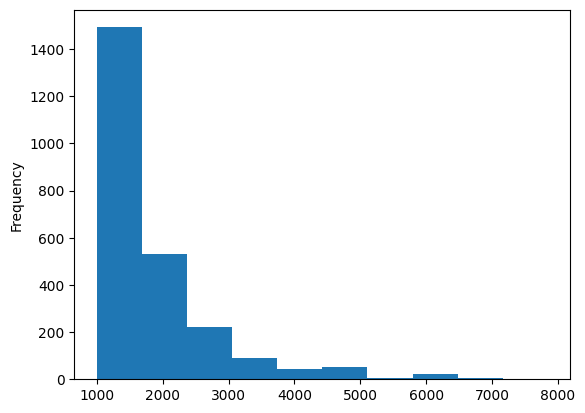

In [75]:
selldf['Price'][selldf['Price']<8000].plot.hist()

In [48]:
selldf['Price'].quantile([0,0.25,0.5,0.7,1])

0.00      1000.0
0.25    203500.0
0.50    295000.0
0.70    379000.0
1.00    999999.0
Name: Price, dtype: float64